In [2]:
#SQLalchemy Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.sql import func

In [3]:
# Dependencies
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date, timedelta
from  matplotlib.ticker import FuncFormatter

# Climate Analysis and Exploration

In [5]:
engine = create_engine("sqlite:///hawai2i.sqlite")

In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()


['measurements', 'stations']

In [7]:
# Assign the [measurements and stations] class to a variable called `measurements and stations`
measurements = Base.classes.measurements
stations = Base.classes.stations

In [8]:
# Create a session
session = Session(engine)

In [9]:
# Display the row's columns and data in dictionary format
prcp_data = session.query(measurements).first()
prcp_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x10f1be160>,
 'date': '2010-01-01',
 'id': 0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [10]:
# Display the row's columns and data in dictionary format
station_data = session.query(stations).first()
station_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x10f1bef28>,
 'elevation': 3.0,
 'id': 0,
 'latitude': 21.2716,
 'location': None,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

# Precipitation Analysis

In [11]:
df = pd.DataFrame(session.query(measurements.station,
                                measurements.date,
                                measurements.prcp,
                                measurements.tobs).all())
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,0.03,73


In [12]:
prcp_analysis_df = df[['date', 'prcp']]
prcp_analysis_df.head()

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,0.03


In [59]:
prcp_year_df = prcp_analysis_df[(prcp_analysis_df['date'] > '2016-08-23') & (prcp_analysis_df['date'] <= '2017-08-23')]
prcp_year_df = prcp_year_df.sort_values(by='date')

In [64]:
prcp_year_df.head()

,date,prcp
2364,2016-08-24,0.08
8825,2016-08-24,0.00
14608,2016-08-24,2.15
7331,2016-08-24,2.28
5091,2016-08-24,2.15


In [54]:
prcp_year_df.dtypes 

date     object
prcp    float64
dtype: object

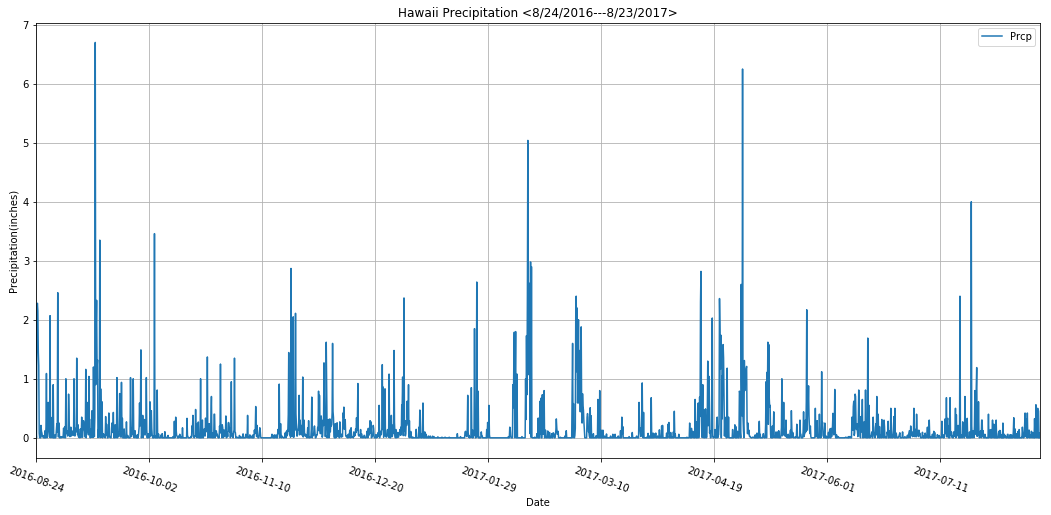

In [61]:
#Plot the dataframe to a horizontal bar chart
prcp_year_df.plot(x='date', figsize = (18,8), rot = 340)
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Precipitation(inches)")
plt.title("Hawaii Precipitation <8/24/2016---8/23/2017>")
plt.legend(["Prcp"])
plt.show()

# Station Analysis

In [16]:
# total number of stations 
station_count = session.query(stations.station).count()
station_count

9

In [17]:
top_active_stations = session.query(stations.station,
                            stations.name,
                            measurements.station,
                            func.count(measurements.tobs)).filter(stations.station == measurements.station).group_by(measurements.station).order_by(func.count(measurements.tobs).desc()).all()

In [18]:
top_active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 'USC00519281', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 'USC00519397', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 'USC00513117', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'USC00514830',
  2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 'USC00517948', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)]

In [19]:
highest_active_station = top_active_stations[0][0:2]

In [20]:
highest_active_station

('USC00519281', 'WAIHEE 837.5, HI US')

In [21]:
#retrieving the last 12 months' temperature observation (tobs)
top_active_observation = session.query(measurements.station,
                                       measurements.tobs).filter(measurements.station == highest_active_station[0],
                                                                 measurements.date > '2016-08-23').all()

In [22]:
len(top_active_observation)

351

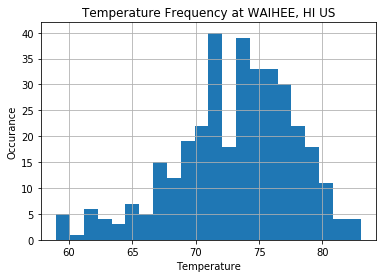

In [26]:
# loop = [x[:] for x in targeted_list]
temperature = [x[1] for x in top_active_observation]

                
plt.hist(temperature, bins=22, histtype='stepfilled') #cahrt figsize to be adjusted 
plt.title("Temperature Frequency at WAIHEE, HI US")
plt.grid(True) 
plt.xlabel("Temperature")
plt.ylabel("Occurance")
plt.show()

# Temperature Analysis